## DAS location map

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime, timezone
import numpy as np
import seaborn as sns
from pathlib import Path
from tqdm import tqdm
import h5py
sns.set_theme()
# import pygmt

In [2]:
figure_path = 'figures'
if not os.path.exists(figure_path):
    os.makedirs(figure_path)

In [3]:
das_mammoth_north = pd.read_csv("/net/kuafu/mnt/tank/data/EventData/Mammoth_north/das_info.csv")
das_mammoth_south = pd.read_csv("/net/kuafu/mnt/tank/data/EventData/Mammoth_south/das_info.csv")
das_ridgecrest = pd.read_csv("/net/kuafu/mnt/tank/data/EventData/Ridgecrest/das_info.csv")
das_ridgecrest_south = pd.read_csv("/net/kuafu/mnt/tank/data/EventData/Ridgecrest_South/das_info.csv")

In [4]:
events_mammoth_north = pd.read_csv("/net/kuafu/mnt/tank/data/EventData/Mammoth_north/catalog.csv", index_col="event_id")
events_mammoth_south = pd.read_csv("/net/kuafu/mnt/tank/data/EventData/Mammoth_south/catalog.csv", index_col="event_id")
events_ridgecrest = pd.read_csv("/net/kuafu/mnt/tank/data/EventData/Ridgecrest/catalog.csv")
events_ridgecrest_south = pd.read_csv("/net/kuafu/mnt/tank/data/EventData/Ridgecrest_South/catalog.csv")

In [12]:
events_ridgecrest.loc[events_ridgecrest["magnitude"].argmax()]

event_id                                  39493944
event_time        2020-06-24T17:40:49.240000+00:00
latitude                                   36.4468
longitude                                -117.9752
depth_km                                      4.66
magnitude                                      5.8
magnitude_type                                  mw
source                                        scsn
Name: 9708, dtype: object

In [6]:
waveform_mammoth_north = list(Path("/net/kuafu/mnt/tank/data/EventData/Mammoth_north/data/").glob("*.h5"))
waveform_mammoth_south = list(Path("/net/kuafu/mnt/tank/data/EventData/Mammoth_south/data/").glob("*.h5"))

In [7]:
event_ids = set()
for x in waveform_mammoth_north:
    event_ids.add(int(x.name.split(".")[0]))
for x in waveform_mammoth_south:
    event_ids.add(int(x.name.split(".")[0]))
event_ids = list(event_ids)

In [8]:
events_mammoth_north = events_mammoth_north[events_mammoth_north.index.isin(event_ids)]
events_mammoth_south = events_mammoth_south[events_mammoth_south.index.isin(event_ids)]

In [9]:
print(f"{len(das_mammoth_north) = }\n{len(das_mammoth_south) = }\n{len(das_ridgecrest) = }\n{len(das_ridgecrest_south) = }")

len(das_mammoth_north) = 4311
len(das_mammoth_south) = 4670
len(das_ridgecrest) = 1150
len(das_ridgecrest_south) = 10000


In [10]:
print(f"{len(events_mammoth_north) = }\n{len(events_mammoth_south) = }\n{len(events_ridgecrest) = }\n{len(events_ridgecrest_south) = }")

len(events_mammoth_north) = 7560
len(events_mammoth_south) = 7560
len(events_ridgecrest) = 12656
len(events_ridgecrest_south) = 2125


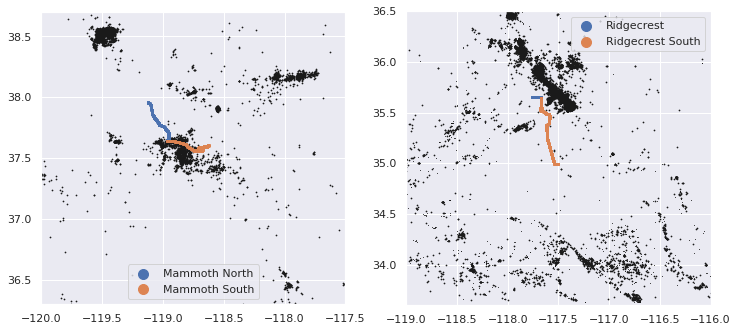

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(events_mammoth_south["longitude"], events_mammoth_south["latitude"], s=3, c="k", linewidth=0, rasterized=True)
axes[0].scatter(das_mammoth_north["longitude"], das_mammoth_north["latitude"], s=1, label="Mammoth North", rasterized=True)
axes[0].scatter(das_mammoth_south["longitude"], das_mammoth_south["latitude"], s=1, label="Mammoth South", rasterized=True)
axes[0].axis("scaled")
axes[0].set_xlim([-120, -117.5])
axes[0].set_ylim([36.3, 38.7])
axes[0].legend(markerscale=10)

axes[1].scatter(events_ridgecrest["longitude"], events_ridgecrest["latitude"], s=3,  c="k", linewidth=0, rasterized=True)
axes[1].scatter(events_ridgecrest_south["longitude"], events_ridgecrest_south["latitude"], s=1, c="k", linewidth=0, rasterized=True)
axes[1].scatter(das_ridgecrest["longitude"], das_ridgecrest["latitude"], s=1, label="Ridgecrest", rasterized=True)
axes[1].scatter(das_ridgecrest_south["longitude"], das_ridgecrest_south["latitude"], s=1, label="Ridgecrest South", rasterized=True)
axes[1].axis("scaled")
axes[1].set_xlim([-119, -116])
axes[1].set_ylim([33.6, 36.5])
axes[1].legend(markerscale=10)

plt.savefig(os.path.join(figure_path, "das_location.png"), dpi=300, bbox_inches="tight")
plt.savefig(os.path.join(figure_path, "das_location.pdf"), dpi=300, bbox_inches="tight")
plt.show()

In [12]:
events_das = pd.read_csv("../association/catalog_gamma.csv")
print(f"{len(events_das) = }")

len(events_das) = 2616


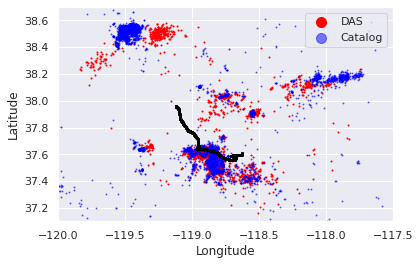

In [13]:
plt.figure(figsize=(6, 10))
plt.scatter(events_das["longitude"], events_das["latitude"], s=1, c="red", label="DAS", rasterized=True)
plt.scatter(events_mammoth_north["longitude"], events_mammoth_north["latitude"], s=1, c="blue", alpha=0.5, label="Catalog", rasterized=True)
# plt.scatter(events_das["longitude"], events_das["latitude"], s=1, label="DAS", rasterized=True)
# plt.scatter(events_mammoth_north["longitude"], events_mammoth_north["latitude"], s=1, alpha=0.5, label="Catalog", rasterized=True)
plt.scatter(das_mammoth_north["longitude"], das_mammoth_north["latitude"], s=1, c="black", alpha=0.5, rasterized=True)
plt.scatter(das_mammoth_south["longitude"], das_mammoth_south["latitude"], s=1, c="black", alpha=0.5, rasterized=True)
plt.legend(markerscale=10)
plt.axis("scaled")
plt.xlim([-120, -117.5])
plt.ylim([37.1, 38.7])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig(os.path.join(figure_path, "earthquake_location_mapview_mammoth.png"), dpi=300, bbox_inches="tight")
plt.savefig(os.path.join(figure_path, "earthquake_location_mapview_mammoth.pdf"), dpi=300, bbox_inches="tight")
plt.show()

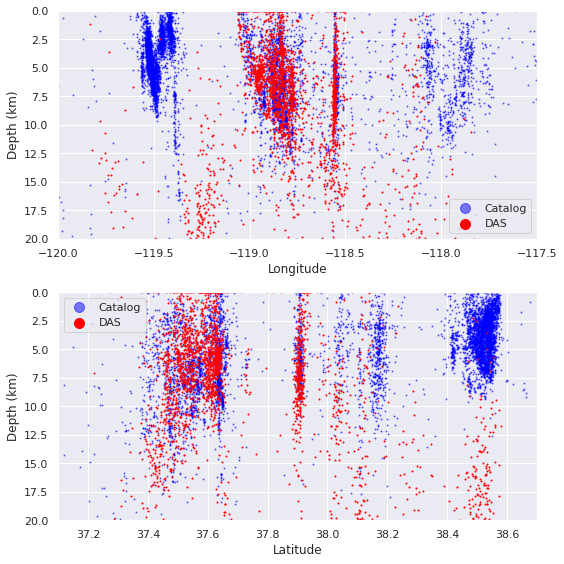

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
axes[0].scatter(events_mammoth_north["longitude"], events_mammoth_north["depth_km"], s=1, c="blue", alpha=0.5, label="Catalog", rasterized=True)
axes[0].scatter(events_das["longitude"], events_das["depth_km"], s=1, c="red", label="DAS", rasterized=True)
axes[0].set_xlim([-120, -117.5])
axes[0].set_ylim([0, 20])
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Depth (km)")
axes[0].invert_yaxis()
axes[0].legend(markerscale=10)


axes[1].scatter(events_mammoth_north["latitude"], events_mammoth_north["depth_km"], s=1, c="blue", alpha=0.5, label="Catalog", rasterized=True)
axes[1].scatter(events_das["latitude"], events_das["depth_km"], s=1, c="red", label="DAS", rasterized=True)
axes[1].set_xlim([37.1, 38.7])
axes[1].set_ylim([0, 20])
axes[1].set_xlabel("Latitude")
axes[1].set_ylabel("Depth (km)")
axes[1].invert_yaxis()
axes[1].legend(markerscale=10)

fig.tight_layout()
plt.savefig(os.path.join(figure_path, "earthquake_location_depth_mammoth.png"), dpi=300, bbox_inches="tight")
plt.savefig(os.path.join(figure_path, "earthquake_location_depth_mammoth.pdf"), dpi=300, bbox_inches="tight")
plt.show()

In [15]:
timestamp_das = events_das["time"].apply(lambda x: datetime.fromisoformat(x).replace(tzinfo=timezone.utc).timestamp()).to_numpy()
timestamp_mammoth_north = events_mammoth_north["event_time"].apply(lambda x: datetime.fromisoformat(x).timestamp()).to_numpy()
diff_time = timestamp_das - timestamp_mammoth_north[:, np.newaxis]
degree2km = 111.3
diff_lat = (events_das["latitude"].to_numpy() - events_mammoth_north["latitude"].to_numpy()[:, np.newaxis]) * degree2km
diff_lon = (events_das["longitude"].to_numpy() - events_mammoth_north["longitude"].to_numpy()[:, np.newaxis]) * degree2km
diff_dep = events_das["depth_km"].to_numpy() - events_mammoth_north["depth_km"].to_numpy()[:, np.newaxis]

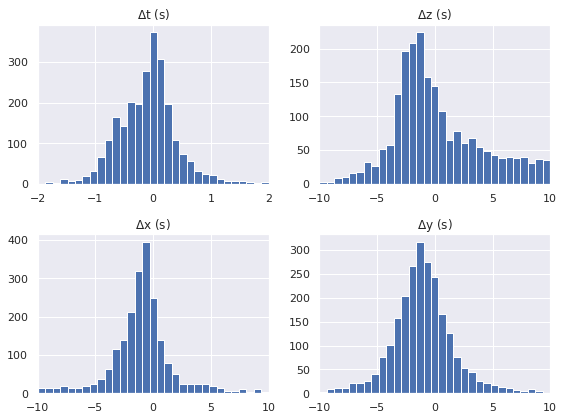

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes[0, 0].hist(diff_time[np.abs(diff_time) < 5], range=[-2, 2], bins=31)#, facecolor="b", edgecolor="k", alpha=0.8)
axes[0, 0].autoscale(enable=True, axis="x", tight=True)
axes[0, 0].set_title(r"$\Delta$t (s)")
axes[0, 1].hist(diff_dep[np.abs(diff_time) < 5], range=[-10, 10], bins=31)#, facecolor="b", edgecolor="k", alpha=0.8)
axes[0, 1].autoscale(enable=True, axis="x", tight=True)
axes[0, 1].set_title(r"$\Delta$z (s)")
axes[1, 0].hist(diff_lon[np.abs(diff_time) < 5], range=[-10, 10], bins=31)#, facecolor="b", edgecolor="k", alpha=0.8)
axes[1, 0].autoscale(enable=True, axis="x", tight=True)
axes[1, 0].set_title(r"$\Delta$x (s)")
axes[1, 1].hist(diff_lat[np.abs(diff_time) < 5], range=[-10, 10], bins=31)#, facecolor="b", edgecolor="k", alpha=0.8)
axes[1, 1].autoscale(enable=True, axis="x", tight=True)
axes[1, 1].set_title(r"$\Delta$y (s)")
fig.tight_layout()
plt.savefig(os.path.join(figure_path, "location_error_mammoth.png"), dpi=300, bbox_inches="tight")
plt.savefig(os.path.join(figure_path, "location_error_mammoth.pdf"), dpi=300, bbox_inches="tight")
plt.show()

In [17]:
recall_idx = (np.abs(diff_time) < 5).any(axis=1)
lon0 = das_mammoth_south["longitude"].iloc[0]
lat0 = das_mammoth_south["latitude"].iloc[0]
events_das["dist_km"] = events_das.apply(lambda x: np.sqrt((x["longitude"] - lon0) ** 2 + (x["latitude"] - lat0) ** 2)*degree2km, axis=1)
events_mammoth_north["dist_km"] = events_mammoth_north.apply(lambda x: np.sqrt((x["longitude"] - lon0) ** 2 + (x["latitude"] - lat0) ** 2)*degree2km, axis=1)

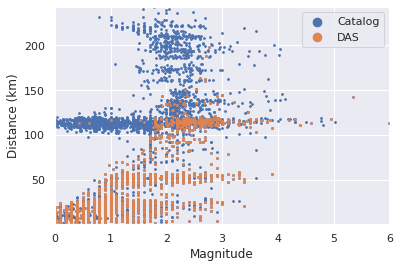

In [18]:

plt.figure(figsize=(6, 4))
plt.scatter(events_mammoth_north["magnitude"], events_mammoth_north["dist_km"], s=3, label="Catalog", rasterized=True)
plt.scatter(events_mammoth_north[recall_idx]["magnitude"], events_mammoth_north[recall_idx]["dist_km"], s=3, label="DAS", rasterized=True)
plt.autoscale(enable=True, axis="both", tight=True)
plt.xlabel("Magnitude")
plt.ylabel("Distance (km)")
plt.legend(markerscale=5)
plt.savefig(os.path.join(figure_path, "earthquake_recall_mammoth.png"), dpi=300, bbox_inches="tight")
plt.savefig(os.path.join(figure_path, "earthquake_recall_mammoth.pdf"), dpi=300, bbox_inches="tight")
plt.show()

In [19]:
precision = np.sum((np.abs(diff_time) < 5).any(axis=1)) / len(events_das)
recall = np.sum((np.abs(diff_time) < 5).any(axis=0)) / len(events_mammoth_north)

In [20]:
print(f"{precision = :.3f} {recall = :.3f}")

precision = 0.801 recall = 0.331


In [57]:
events_das = pd.read_csv("../association/Ridgecrest/catalog_gamma.csv")
events = events_ridgecrest
das = das_ridgecrest
das_name = "ridgecret"
print(f"{len(events_das) = }")

len(events_das) = 1521


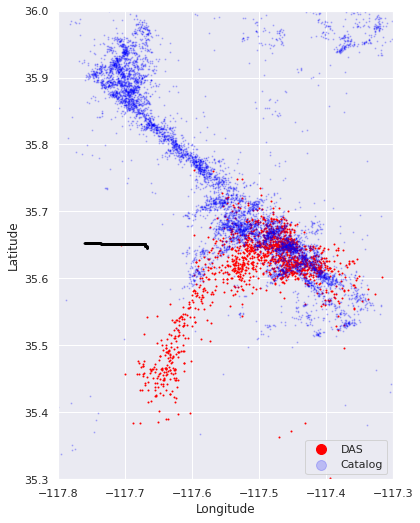

In [58]:
plt.figure(figsize=(6, 10))
plt.scatter(events_das["longitude"], events_das["latitude"], s=1, c="red", label="DAS", rasterized=True)
plt.scatter(events["longitude"], events["latitude"], s=1, c="blue", alpha=0.2, label="Catalog", rasterized=True)
plt.scatter(das["longitude"], das["latitude"], s=1, c="black", alpha=0.5, rasterized=True)
plt.legend(markerscale=10)
plt.axis("scaled")
plt.xlim([-117.8, -117.3])
plt.ylim([35.3, 36.0])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig(os.path.join(figure_path, f"earthquake_location_mapview_{das_name}.png"), dpi=300, bbox_inches="tight")
plt.savefig(os.path.join(figure_path, f"earthquake_location_mapview_{das_name}.pdf"), dpi=300, bbox_inches="tight")
plt.show()

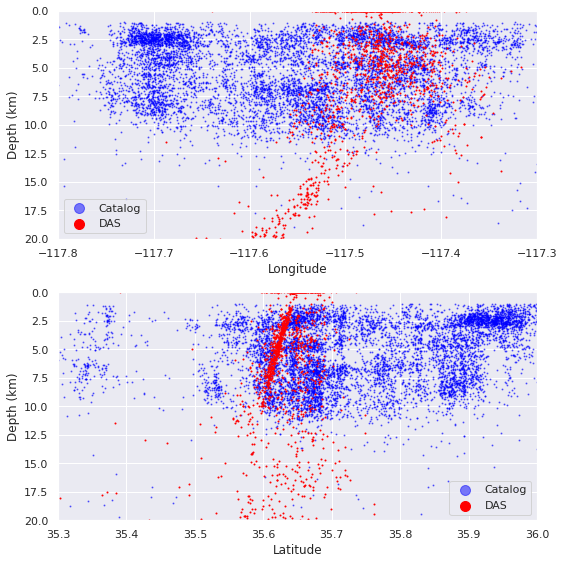

In [59]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
axes[0].scatter(events["longitude"], events["depth_km"], s=1, c="blue", alpha=0.5, label="Catalog", rasterized=True)
axes[0].scatter(events_das["longitude"], events_das["depth_km"], s=1, c="red", label="DAS", rasterized=True)
axes[0].set_xlim([-117.8, -117.3])
axes[0].set_ylim([0, 20])
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Depth (km)")
axes[0].invert_yaxis()
axes[0].legend(markerscale=10)


axes[1].scatter(events["latitude"], events["depth_km"], s=1, c="blue", alpha=0.5, label="Catalog", rasterized=True)
axes[1].scatter(events_das["latitude"], events_das["depth_km"], s=1, c="red", label="DAS", rasterized=True)
axes[1].set_xlim([35.3, 36.0])
axes[1].set_ylim([0, 20])
axes[1].set_xlabel("Latitude")
axes[1].set_ylabel("Depth (km)")
axes[1].invert_yaxis()
axes[1].legend(markerscale=10)

fig.tight_layout()
plt.savefig(os.path.join(figure_path, f"earthquake_location_depth_{das_name}.png"), dpi=300, bbox_inches="tight")
plt.savefig(os.path.join(figure_path, f"earthquake_location_depth_{das_name}.pdf"), dpi=300, bbox_inches="tight")
plt.show()

In [60]:
timestamp_das = events_das["time"].apply(lambda x: datetime.fromisoformat(x).replace(tzinfo=timezone.utc).timestamp()).to_numpy()
timestamp = events["event_time"].apply(lambda x: datetime.fromisoformat(x).timestamp()).to_numpy()
diff_time = timestamp_das - timestamp[:, np.newaxis]
degree2km = 111.3
diff_lat = (events_das["latitude"].to_numpy() - events["latitude"].to_numpy()[:, np.newaxis]) * degree2km
diff_lon = (events_das["longitude"].to_numpy() - events["longitude"].to_numpy()[:, np.newaxis]) * degree2km
diff_dep = events_das["depth_km"].to_numpy() - events["depth_km"].to_numpy()[:, np.newaxis]

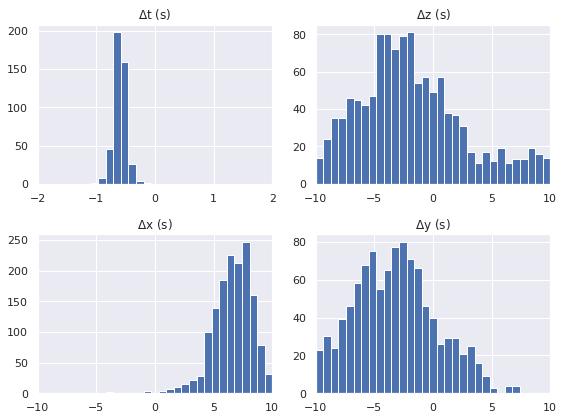

In [61]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes[0, 0].hist(diff_time[np.abs(diff_time) < 5], range=[-2, 2], bins=31)#, facecolor="b", edgecolor="k", alpha=0.8)
axes[0, 0].autoscale(enable=True, axis="x", tight=True)
axes[0, 0].set_title(r"$\Delta$t (s)")
axes[0, 1].hist(diff_dep[np.abs(diff_time) < 5], range=[-10, 10], bins=31)#, facecolor="b", edgecolor="k", alpha=0.8)
axes[0, 1].autoscale(enable=True, axis="x", tight=True)
axes[0, 1].set_title(r"$\Delta$z (s)")
axes[1, 0].hist(diff_lon[np.abs(diff_time) < 5], range=[-10, 10], bins=31)#, facecolor="b", edgecolor="k", alpha=0.8)
axes[1, 0].autoscale(enable=True, axis="x", tight=True)
axes[1, 0].set_title(r"$\Delta$x (s)")
axes[1, 1].hist(diff_lat[np.abs(diff_time) < 5], range=[-10, 10], bins=31)#, facecolor="b", edgecolor="k", alpha=0.8)
axes[1, 1].autoscale(enable=True, axis="x", tight=True)
axes[1, 1].set_title(r"$\Delta$y (s)")
fig.tight_layout()
plt.savefig(os.path.join(figure_path, f"location_error_{das_name}.png"), dpi=300, bbox_inches="tight")
plt.savefig(os.path.join(figure_path, f"location_error_{das_name}.pdf"), dpi=300, bbox_inches="tight")
plt.show()

In [62]:
recall_idx = (np.abs(diff_time) < 5).any(axis=1)
lon0 = das["longitude"].iloc[0]
lat0 = das["latitude"].iloc[0]
events_das["dist_km"] = events_das.apply(lambda x: np.sqrt((x["longitude"] - lon0) ** 2 + (x["latitude"] - lat0) ** 2)*degree2km, axis=1)
events["dist_km"] = events.apply(lambda x: np.sqrt((x["longitude"] - lon0) ** 2 + (x["latitude"] - lat0) ** 2)*degree2km, axis=1)

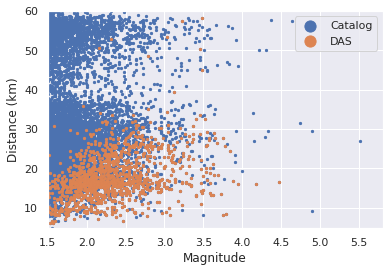

In [64]:

plt.figure(figsize=(6, 4))
plt.scatter(events["magnitude"], events["dist_km"], s=5, label="Catalog", rasterized=True)
plt.scatter(events[recall_idx]["magnitude"], events[recall_idx]["dist_km"], s=5, label="DAS", rasterized=True)
plt.autoscale(enable=True, axis="both", tight=True)
plt.xlabel("Magnitude")
plt.ylabel("Distance (km)")
plt.ylim(top=60)
# plt.xlim(left=2.0)
plt.legend(markerscale=5)
plt.savefig(os.path.join(figure_path, f"earthquake_recall_{das_name}.png"), dpi=300, bbox_inches="tight")
plt.savefig(os.path.join(figure_path, f"earthquake_recall_{das_name}.pdf"), dpi=300, bbox_inches="tight")
plt.show()

In [27]:
precision = np.sum((np.abs(diff_time) < 5).any(axis=1)) / len(events_das)
recall = np.sum((np.abs(diff_time) < 5).any(axis=0)) / len(events_mammoth_north)

In [28]:
print(f"{precision = :.3f} {recall = :.3f}")

precision = 0.943 recall = 0.157


In [ ]:
selected_event_ids = ["39493944"]
das_dir = "Ridgecrest"

# sns.reset_orig()
sns.set_theme()

sampling_rate = 100
dt = 1.0 / sampling_rate
for i, event_id in tqdm(enumerate(selected_event_ids)):
# for i, event_id in tqdm(enumerate(events_mammoth_north.index)):

    raw_picks = pd.read_csv(f"/net/kuafu/mnt/tank/data/EventData/{das_dir}/picks_phasenet_raw/{event_id}.csv")
    raw_picks["channel_index"] = raw_picks["station_id"]
    raw_picks["color"] = raw_picks["phase_type"].apply(lambda x: "r" if x == "p" else "b")

    try:
        das_picks = pd.read_csv(f"/net/kuafu/mnt/tank/data/EventData/{das_dir}/picks_phasenet_das/{event_id}.csv")
    except:
        continue
    das_picks["color"] = das_picks["phase_type"].apply(lambda x: "r" if x == "P" else "b")

    t0 = 25
    tn = 55
    with h5py.File(f"/net/kuafu/mnt/tank/data/EventData/{das_dir}/data/{event_id}.h5", "r") as f:
        waveform = f["data"][t0*sampling_rate:tn*sampling_rate, :]
    nt, nx = waveform.shape
    

    fig, axes = plt.subplots(3, 1, figsize=(8, 9), sharex=True)

    waveform -= np.median(waveform, axis=1, keepdims=True)
    waveform -= np.median(waveform, axis=0, keepdims=True)
    waveform /= np.std(waveform, axis=0, keepdims=True)
    vmax = np.std(waveform)
    axes[0].imshow(waveform, vmax=vmax*0.6, vmin=-vmax*0.6, aspect="auto", cmap="seismic", extent=([0, nx, tn-t0, 0]))
    axes[0].grid(False)
    axes[0].set_ylabel("Time (s)")

    axes[1].scatter(raw_picks["channel_index"], raw_picks["phase_index"] * dt - t0, s=1, c=raw_picks["color"], label="Raw Picks", linewidth=1, rasterized=True)
    axes[1].set_xlim([0, nx])
    axes[1].set_ylim([0, tn - t0])
    axes[1].invert_yaxis()
    # axes[1].set_xlabel("Channel index")
    axes[1].set_ylabel("Time (s)")

    axes[2].scatter(das_picks["channel_index"], das_picks["phase_index"] * dt - t0, s=1, c=das_picks["color"], label="Raw", linewidth=1, rasterized=True)
    axes[2].set_xlim([0, nx])
    axes[2].set_ylim([0, tn - t0])
    axes[2].invert_yaxis()
    # axes[2].set_xlabel("Channel index")
    axes[2].set_ylabel("Time (s)")

    fig.tight_layout()
    try:
        plt.savefig(os.path.join(figure_path, f"examples/{event_id}.png"), dpi=300, bbox_inches="tight")
    except:
        os.mkdir(os.path.join(figure_path, f"examples"))
        plt.savefig(os.path.join(figure_path, f"examples/{event_id}.png"), dpi=300, bbox_inches="tight")
    
    plt.show()
    if i > 100:
        break
    # break

In [49]:
events_das = pd.read_csv("../association/Ridgecrest_south/catalog_gamma.csv")
events = events_ridgecrest_south
das = das_ridgecrest_south
das_name = "ridgecret_south"
print(f"{len(events_das) = }")

len(events_das) = 784


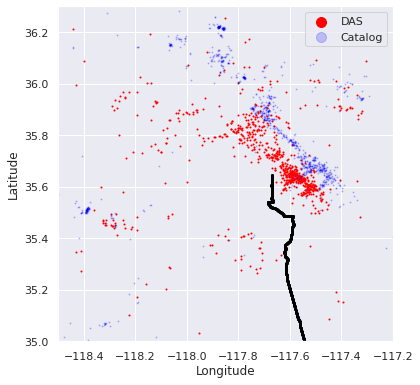

In [50]:
plt.figure(figsize=(6, 10))
plt.scatter(events_das["longitude"], events_das["latitude"], s=1, c="red", label="DAS", rasterized=True)
plt.scatter(events["longitude"], events["latitude"], s=1, c="blue", alpha=0.2, label="Catalog", rasterized=True)
plt.scatter(das["longitude"], das["latitude"], s=1, c="black", alpha=0.5, rasterized=True)
plt.legend(markerscale=10)
plt.axis("scaled")
plt.xlim([-118.5, -117.2])
plt.ylim([35.0, 36.3])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig(os.path.join(figure_path, f"earthquake_location_mapview_{das_name}.png"), dpi=300, bbox_inches="tight")
plt.savefig(os.path.join(figure_path, f"earthquake_location_mapview_{das_name}.pdf"), dpi=300, bbox_inches="tight")
plt.show()

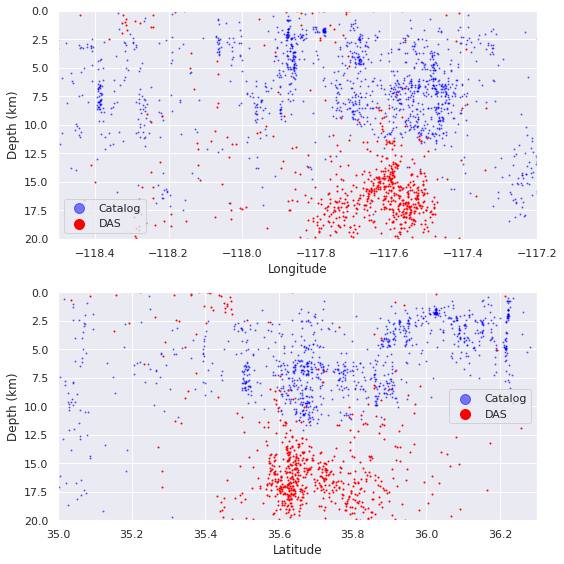

In [51]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
axes[0].scatter(events["longitude"], events["depth_km"], s=1, c="blue", alpha=0.5, label="Catalog", rasterized=True)
axes[0].scatter(events_das["longitude"], events_das["depth_km"], s=1, c="red", label="DAS", rasterized=True)
axes[0].set_xlim([-118.5, -117.2])
axes[0].set_ylim([0, 20])
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Depth (km)")
axes[0].invert_yaxis()
axes[0].legend(markerscale=10)


axes[1].scatter(events["latitude"], events["depth_km"], s=1, c="blue", alpha=0.5, label="Catalog", rasterized=True)
axes[1].scatter(events_das["latitude"], events_das["depth_km"], s=1, c="red", label="DAS", rasterized=True)
axes[1].set_xlim([35.0, 36.3])
axes[1].set_ylim([0, 20])
axes[1].set_xlabel("Latitude")
axes[1].set_ylabel("Depth (km)")
axes[1].invert_yaxis()
axes[1].legend(markerscale=10)

fig.tight_layout()
plt.savefig(os.path.join(figure_path, f"earthquake_location_depth_{das_name}.png"), dpi=300, bbox_inches="tight")
plt.savefig(os.path.join(figure_path, f"earthquake_location_depth_{das_name}.pdf"), dpi=300, bbox_inches="tight")
plt.show()

In [52]:
# timestamp_das = events_das["time"].apply(lambda x: datetime.fromisoformat(x).replace(tzinfo=timezone.utc).timestamp()).to_numpy()
timestamp_das = events_das["time"].apply(lambda x: datetime.fromisoformat(x).timestamp()).to_numpy()
timestamp = events["event_time"].apply(lambda x: datetime.fromisoformat(x).timestamp()).to_numpy()
diff_time = timestamp_das - timestamp[:, np.newaxis]
degree2km = 111.3
diff_lat = (events_das["latitude"].to_numpy() - events["latitude"].to_numpy()[:, np.newaxis]) * degree2km
diff_lon = (events_das["longitude"].to_numpy() - events["longitude"].to_numpy()[:, np.newaxis]) * degree2km
diff_dep = events_das["depth_km"].to_numpy() - events["depth_km"].to_numpy()[:, np.newaxis]

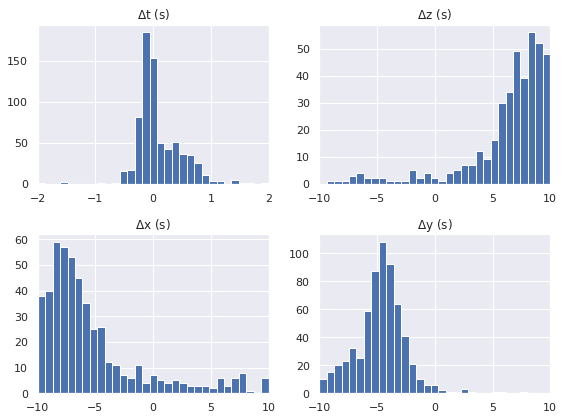

In [54]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes[0, 0].hist(diff_time[np.abs(diff_time) < 5], range=[-2, 2], bins=31)#, facecolor="b", edgecolor="k", alpha=0.8)
axes[0, 0].autoscale(enable=True, axis="x", tight=True)
axes[0, 0].set_title(r"$\Delta$t (s)")
axes[0, 1].hist(diff_dep[np.abs(diff_time) < 5], range=[-10, 10], bins=31)#, facecolor="b", edgecolor="k", alpha=0.8)
axes[0, 1].autoscale(enable=True, axis="x", tight=True)
axes[0, 1].set_title(r"$\Delta$z (s)")
axes[1, 0].hist(diff_lon[np.abs(diff_time) < 5], range=[-10, 10], bins=31)#, facecolor="b", edgecolor="k", alpha=0.8)
axes[1, 0].autoscale(enable=True, axis="x", tight=True)
axes[1, 0].set_title(r"$\Delta$x (s)")
axes[1, 1].hist(diff_lat[np.abs(diff_time) < 5], range=[-10, 10], bins=31)#, facecolor="b", edgecolor="k", alpha=0.8)
axes[1, 1].autoscale(enable=True, axis="x", tight=True)
axes[1, 1].set_title(r"$\Delta$y (s)")
fig.tight_layout()
plt.savefig(os.path.join(figure_path, f"location_error_{das_name}.png"), dpi=300, bbox_inches="tight")
plt.savefig(os.path.join(figure_path, f"location_error_{das_name}.pdf"), dpi=300, bbox_inches="tight")
plt.show()

In [55]:
recall_idx = (np.abs(diff_time) < 5).any(axis=1)
lon0 = das["longitude"].mean()
lat0 = das["latitude"].mean()
events_das["dist_km"] = events_das.apply(lambda x: np.sqrt((x["longitude"] - lon0) ** 2 + (x["latitude"] - lat0) ** 2)*degree2km, axis=1)
events["dist_km"] = events.apply(lambda x: np.sqrt((x["longitude"] - lon0) ** 2 + (x["latitude"] - lat0) ** 2)*degree2km, axis=1)

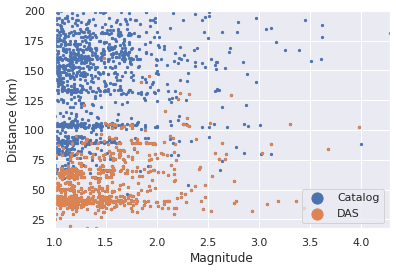

In [56]:

plt.figure(figsize=(6, 4))
plt.scatter(events["magnitude"], events["dist_km"], s=5, label="Catalog", rasterized=True)
plt.scatter(events[recall_idx]["magnitude"], events[recall_idx]["dist_km"], s=5, label="DAS", rasterized=True)
plt.autoscale(enable=True, axis="both", tight=True)
plt.xlabel("Magnitude")
plt.ylabel("Distance (km)")
plt.ylim(top=200)
plt.legend(markerscale=5)
plt.savefig(os.path.join(figure_path, f"earthquake_recall_{das_name}.png"), dpi=300, bbox_inches="tight")
plt.savefig(os.path.join(figure_path, f"earthquake_recall_{das_name}.pdf"), dpi=300, bbox_inches="tight")
plt.show()

In [36]:
precision = np.sum((np.abs(diff_time) < 5).any(axis=1)) / len(events_das)
recall = np.sum((np.abs(diff_time) < 5).any(axis=0)) / len(events_mammoth_north)

In [37]:
print(f"{precision = :.3f} {recall = :.3f}")

precision = 0.866 recall = 0.096


0it [00:00, ?it/s]

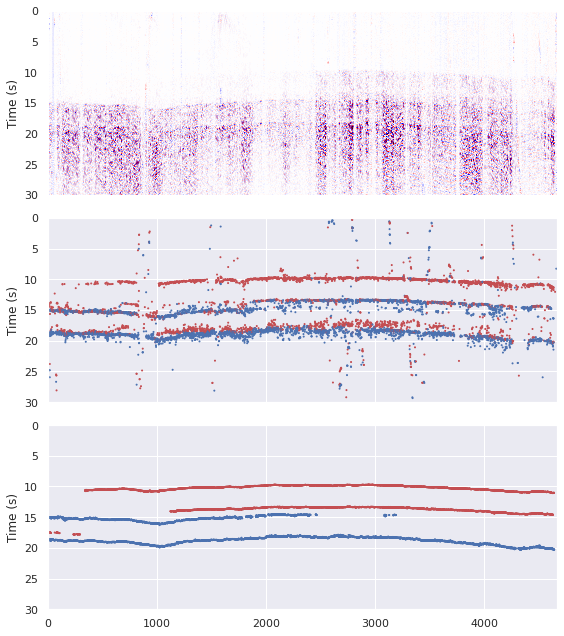

1it [00:08,  8.24s/it]

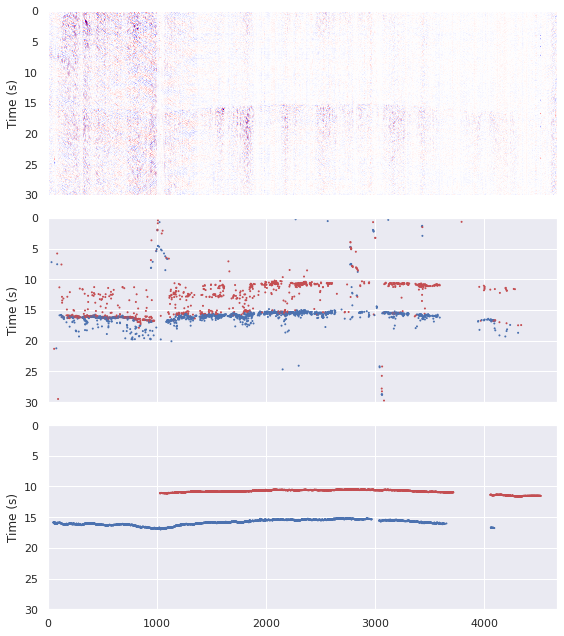

2it [00:15,  7.41s/it]

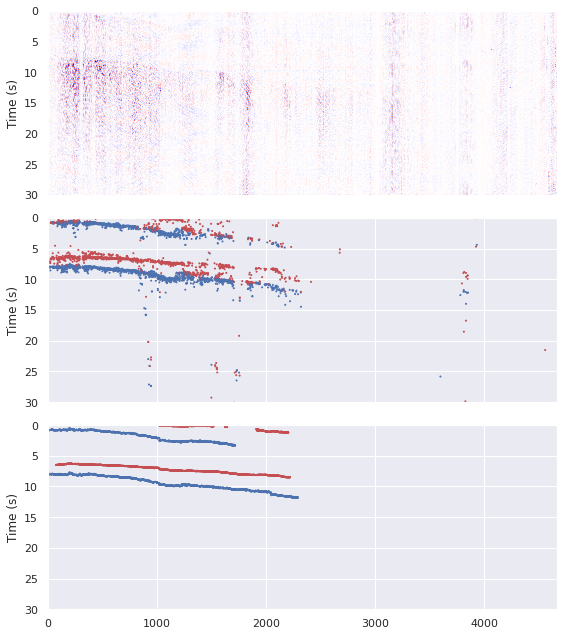

3it [00:25,  8.69s/it]

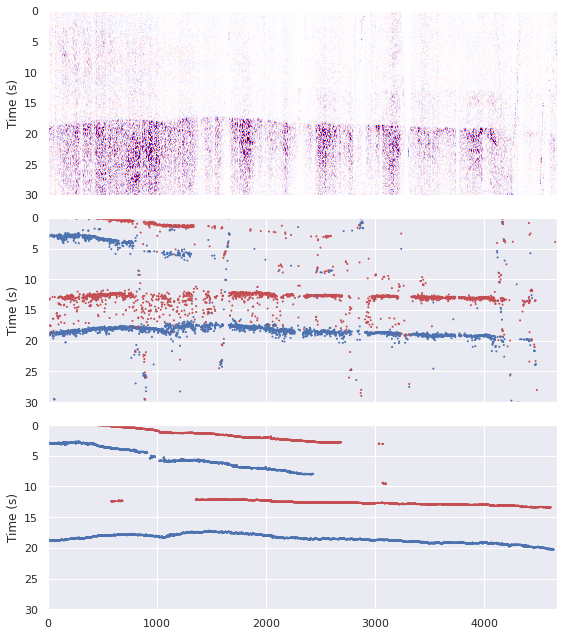

4it [00:33,  8.59s/it]

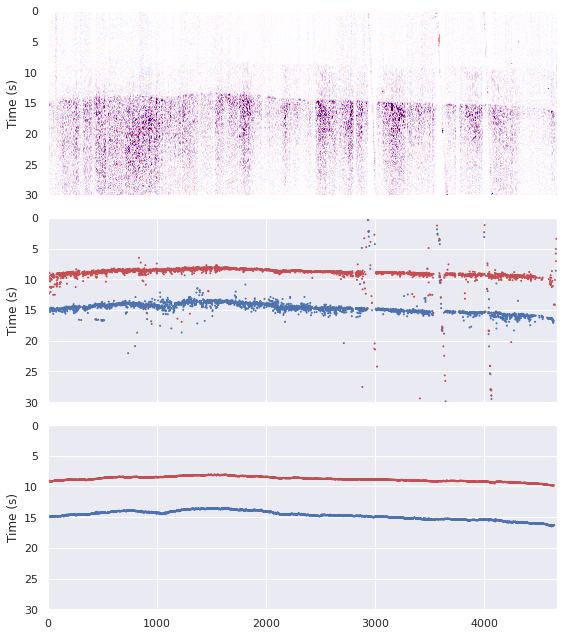

5it [00:43,  9.11s/it]

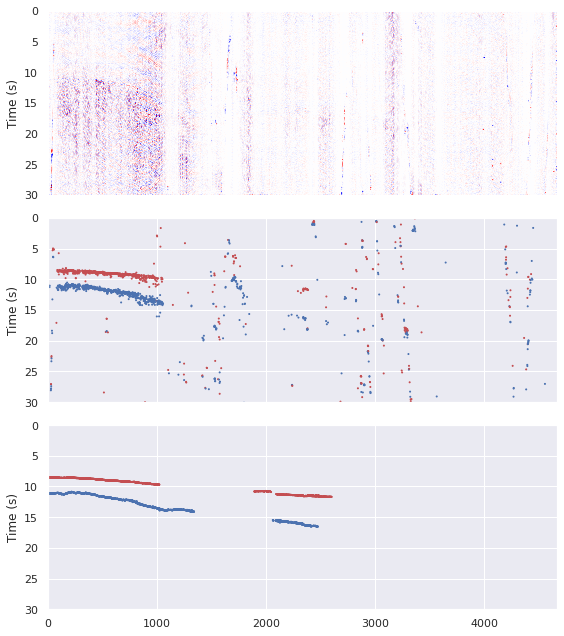

6it [00:49,  8.04s/it]

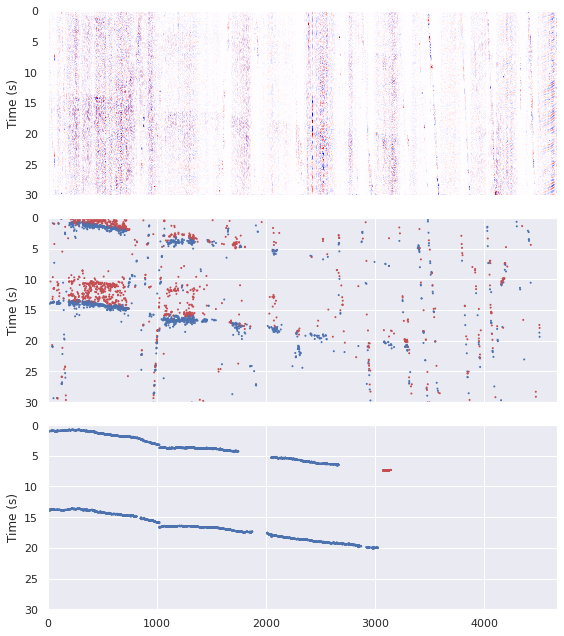

7it [00:58,  8.36s/it]

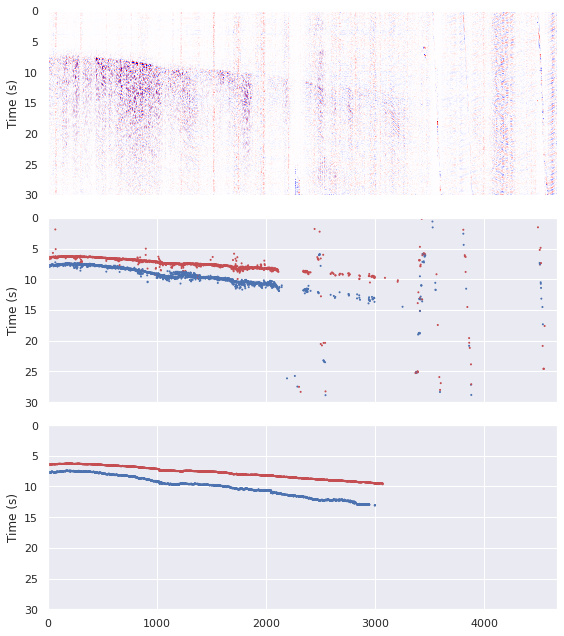

8it [01:05,  7.83s/it]

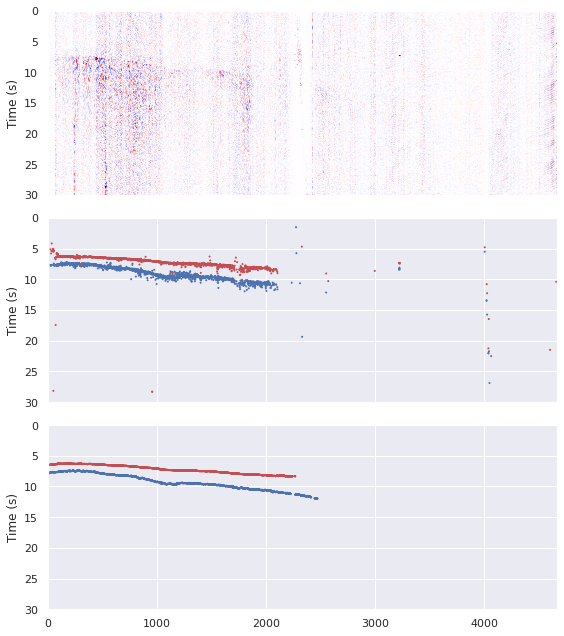

9it [01:11,  7.37s/it]

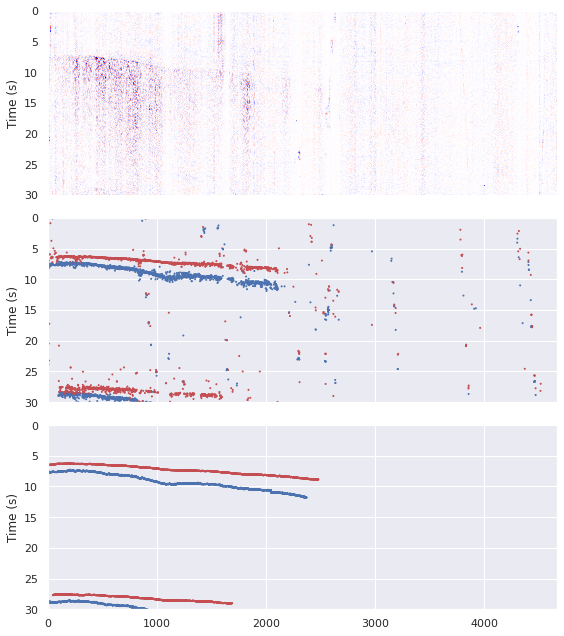

10it [01:19,  7.42s/it]

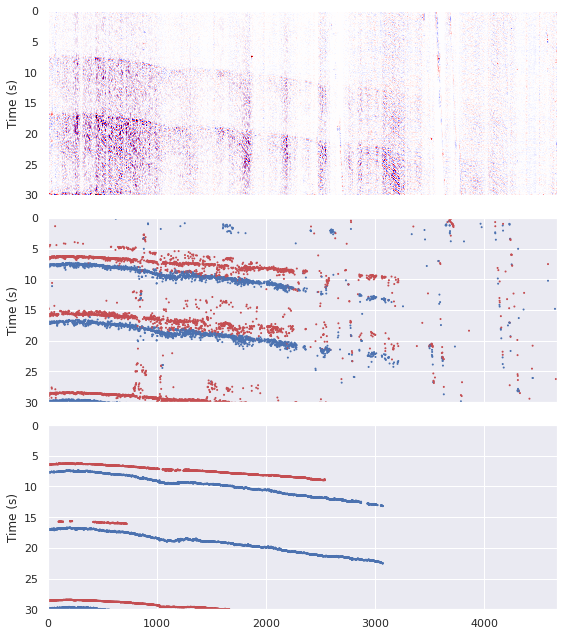

11it [01:26,  7.50s/it]

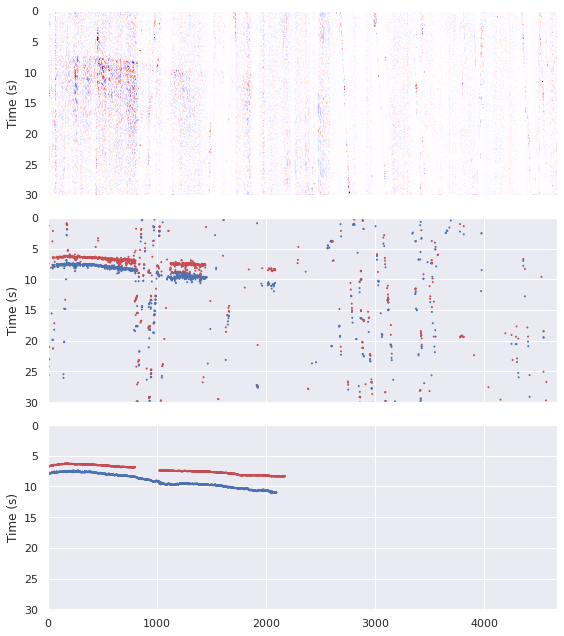

12it [01:36,  8.07s/it]

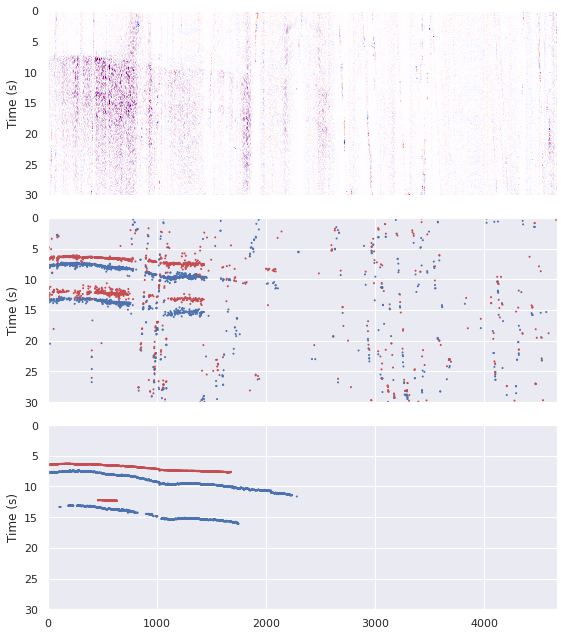

13it [01:43,  8.00s/it]


In [39]:
selected_event_ids = ["71114014", "71118574", "71118679", "71121589", "71121689", "71123139", "71123184", "73475186", "73484126", "73484266", "73484351", "73484856", "73484861"]

# sns.reset_orig()
sns.set_theme()

sampling_rate = 100
dt = 1.0 / sampling_rate
for i, event_id in tqdm(enumerate(selected_event_ids)):
# for i, event_id in tqdm(enumerate(events_mammoth_north.index)):

    raw_picks = pd.read_csv(f"/net/kuafu/mnt/tank/data/EventData/Mammoth_north/picks_phasenet_raw/{event_id}.csv")
    raw_picks["channel_index"] = raw_picks["station_id"]
    raw_picks["color"] = raw_picks["phase_type"].apply(lambda x: "r" if x == "p" else "b")

    try:
        das_picks = pd.read_csv(f"/net/kuafu/mnt/tank/data/EventData/Mammoth_north/picks_phasenet_das/{event_id}.csv")
    except:
        continue
    das_picks["color"] = das_picks["phase_type"].apply(lambda x: "r" if x == "P" else "b")

    t0 = 25
    tn = 55
    with h5py.File(f"/net/kuafu/mnt/tank/data/EventData/Mammoth_north/data/{event_id}.h5", "r") as f:
        waveform = f["data"][t0*sampling_rate:tn*sampling_rate, :]
    nt, nx = waveform.shape
    

    fig, axes = plt.subplots(3, 1, figsize=(8, 9), sharex=True)

    waveform -= np.median(waveform, axis=1, keepdims=True)
    waveform -= np.median(waveform, axis=0, keepdims=True)
    waveform /= np.std(waveform, axis=0, keepdims=True)
    vmax = np.std(waveform)
    axes[0].imshow(waveform, vmax=vmax*0.6, vmin=-vmax*0.6, aspect="auto", cmap="seismic", extent=([0, nx, tn-t0, 0]))
    axes[0].grid(False)
    axes[0].set_ylabel("Time (s)")

    axes[1].scatter(raw_picks["channel_index"], raw_picks["phase_index"] * dt - t0, s=1, c=raw_picks["color"], label="Raw Picks", linewidth=1, rasterized=True)
    axes[1].set_xlim([0, nx])
    axes[1].set_ylim([0, tn - t0])
    axes[1].invert_yaxis()
    # axes[1].set_xlabel("Channel index")
    axes[1].set_ylabel("Time (s)")

    axes[2].scatter(das_picks["channel_index"], das_picks["phase_index"] * dt - t0, s=1, c=das_picks["color"], label="Raw", linewidth=1, rasterized=True)
    axes[2].set_xlim([0, nx])
    axes[2].set_ylim([0, tn - t0])
    axes[2].invert_yaxis()
    # axes[2].set_xlabel("Channel index")
    axes[2].set_ylabel("Time (s)")

    fig.tight_layout()
    try:
        plt.savefig(os.path.join(figure_path, f"examples/{event_id}.png"), dpi=300, bbox_inches="tight")
    except:
        os.mkdir(os.path.join(figure_path, f"examples"))
        plt.savefig(os.path.join(figure_path, f"examples/{event_id}.png"), dpi=300, bbox_inches="tight")
    
    plt.show()
    if i > 100:
        break
    # break